In [49]:
import pandas
import numpy as np
df = pandas.read_csv('./Logs/FlowTest65um-300424-steadyflowonly.csv')
#120
Frval = [80,70,60,50,40,30,20]
Frset = [[],[],[],[],[],[],[]]
start,end = 0,8
for k, Fr in enumerate(Frset):
    for i in range(start,end):
        for j in range(1,4):
            data_str = df.iloc[i, j]
            elements = data_str[1:-1].split(',')
            elements = [Frset[k].append((float(element.strip())- Frval[k])) for element in elements] #- Frval[k] - Frval[k])/Frval[k]*100
    start = end + 1
    end = end + 8
    print(len(Frset[k]))
print(Frset[6])



525
561
669
810
852
1320
1905
[0.03448275862069039, 0.03448275862069039, 0.06896551724138078, -0.10344827586206762, 0.10344827586206762, 0.10344827586206762, 0.0, -0.137931034482758, -0.2068965517241388, -0.1724137931034484, 0.10344827586206762, 0.03448275862069039, 0.10344827586206762, -0.137931034482758, -0.10344827586206762, 0.03448275862069039, 0.03448275862069039, 0.0, -0.03448275862069039, -0.03448275862069039, 0.06896551724138078, -0.03448275862069039, 0.137931034482758, 0.0, 0.06896551724138078, 0.0, -10.827586206896552, 6.379310344827587, 2.793103448275861, -12.241379310344827, 5.896551724137932, 0.724137931034484, -0.9310344827586192, 0.137931034482758, 0.06896551724138078, -0.06896551724138078, 0.03448275862069039, 0.0, 0.03448275862069039, -0.137931034482758, 0.06896551724138078, 0.10344827586206762, -0.10344827586206762, -0.03448275862069039, -0.06896551724138078, 0.06896551724138078, -0.03448275862069039, 0.03448275862069039, 0.1724137931034484, -0.06896551724138078, -0.3

1905
1905
1905
1905
1905
1905
1905


C:\Users\bdigg\AppData\Local\Temp\ipykernel_31528\2759608489.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Value', data=df_melted, inner='quartile',palette=blue_palette, width=0.8)
C:\Users\bdigg\AppData\Local\Temp\ipykernel_31528\2759608489.py:39: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='Group', y='Value', data=df_melted, inner='quartile',palette=blue_palette, width=0.8)


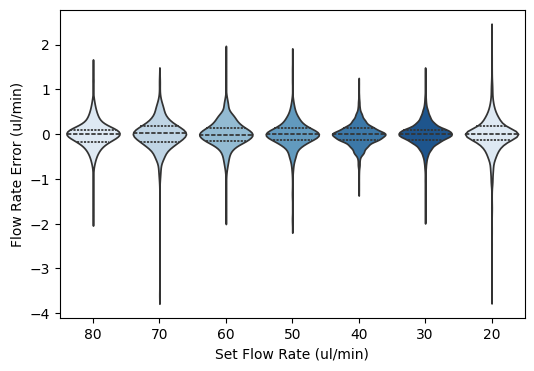

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



max_length = max(len(Frset[0]), len(Frset[1]), len(Frset[2]), len(Frset[3]), len(Frset[4]), len(Frset[5]), len(Frset[6]))
Frset1 = []

Frset[6] = Frset[6][300:-1]

for data in Frset:
    data += [np.nan] * (max_length - len(data))
    Frset1.append(data)
    print(len(data))



# Combine data into a DataFrame
df = pd.DataFrame({
    '80': Frset1[0],
    '70': Frset1[1],
    '60': Frset1[2],
    '50': Frset1[3],
    '40': Frset1[4],
    '30': Frset1[5],
    '20': Frset1[6]
})

# Melt the DataFrame to long format
df_melted = pd.melt(df, var_name='Group', value_name='Value')

blue_palette = sns.color_palette("Blues", n_colors=6)



# Create grouped violin plot
plt.figure(figsize=(6,4))
sns.violinplot(x='Group', y='Value', data=df_melted, inner='quartile',palette=blue_palette, width=0.8)
plt.xlabel('Set Flow Rate (ul/min)')
plt.ylabel('Flow Rate Error (ul/min)')
plt.savefig('FlowControl-V2-1.png', bbox_inches='tight', dpi=1000)
plt.show()

In [66]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
sheet1 = pd.read_excel(r"./Logs/SwitchingTest-20toX-65umR-300424explog.xlsx", 'Sheet1')["Eq Time"]
print(sheet1[1])
#Switching from 20,80
Frval = [80,70,60,50,40,30]
Eqtime = [[],[],[],[],[],[]]
start = 0
for k, Fr in enumerate(Frval):
    Eqtime[k].append(sheet1[start+1]-3)
    Eqtime[k].append(sheet1[start+3]-3)
    Eqtime[k].append(sheet1[start+5]-3)
    Eqtime[k].append(sheet1[start+7]-3)
    start = start + 8
print(Eqtime[1])
print(Eqtime[2])
print(Eqtime[0])



7.29040789604187
[3.0121803283691406, 2.8529696464538574, 6.955070495605469, 15.8486442565918]
[3.938357353210449, 5.038702726364136, 8.58928322792053, 3.4612302780151367]
[4.29040789604187, 3.830414295196533, 12.08225846290588, 5.526661157608032]


    Group      Value
0   20-80   4.290408
1   20-80   3.830414
2   20-80  12.082258
3   20-80   5.526661
4   20-70   3.012180
5   20-70   2.852970
6   20-70   6.955070
7   20-70  15.848644
8   20-60   3.938357
9   20-60   5.038703
10  20-60   8.589283
11  20-60   3.461230
12  20-50   6.696194
13  20-50   5.649243
14  20-50   9.551764
15  20-50   9.692744
16  20-40   3.843844
17  20-40   3.617522
18  20-40   2.580425
19  20-40   1.928438
20  20-30   1.603406
21  20-30   1.937511
22  20-30   6.465893
23  20-30   5.131159


C:\Users\bdigg\AppData\Local\Temp\ipykernel_31528\950963307.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=df_melted,palette=blue_palette, width=0.8)


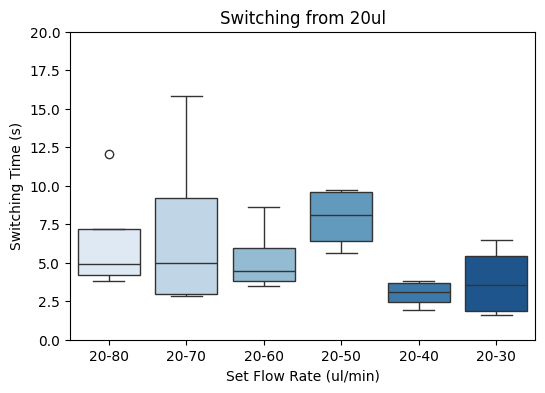

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#print(len(Eqtime[2][i]),len(Eqtime[0][i]),len(Eqtime[1][i]))
df = pd.DataFrame({
    '20-80': Eqtime[0],
    '20-70': Eqtime[1],
    '20-60': Eqtime[2],
    '20-50': Eqtime[3],
    '20-40': Eqtime[4],
    '20-30': Eqtime[5],
})

# Melt the DataFrame to long format
df_melted = pd.melt(df, var_name='Group', value_name='Value')
print(df_melted)

blue_palette = sns.color_palette("Blues", n_colors=6)



# Create grouped violin plot
plt.figure(figsize=(6, 4))
plt.title("Switching from 20ul")
#sns.violinplot(x='Group', y='Value', data=df_melted, inner='quartile',palette=blue_palette, width=0.8)
sns.boxplot(x='Group', y='Value', data=df_melted,palette=blue_palette, width=0.8)
plt.xlabel('Set Flow Rate (ul/min)')
plt.ylim(0,20)
plt.ylabel('Switching Time (s)')
plt.savefig('SwitchingTime-20ul.png', bbox_inches='tight', dpi=1000)
plt.show()

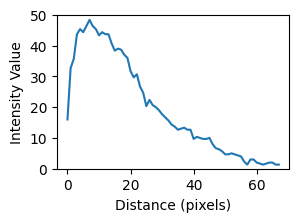

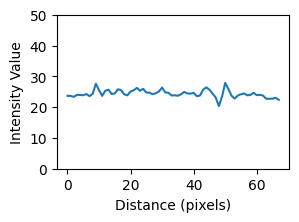

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Replace 'your_file.csv' with the path to your CSV file
file_path1 = './ChipMixing/Multisnake-NBD-1values.csv'
file_path2 = './ChipMixing/Multisnake-NBD-2-3030-values.csv'
df1 = pd.read_csv(file_path1)[0:68]
df2 = pd.read_csv(file_path2)[0:68]


# Plot the XY data
plt.figure(figsize=(3, 2))  # Adjust the figure size as needed
plt.plot(df1['Distance_(pixels)'], df1['Gray_Value'], linestyle='-')
plt.xlabel('Distance (pixels)')  # Add label to X axis
plt.ylabel('Intensity Value')  # Add label to Y axis
plt.ylim(0,50)
plt.show()

plt.figure(figsize=(3, 2))  # Adjust the figure size as needed
plt.plot(df2['Distance_(pixels)'], df2['Gray_Value'], linestyle='-')  # Customize marker and linestyle as needed
plt.xlabel('Distance (pixels)')  # Add label to X axis
plt.ylabel('Intensity Value')  # Add label to Y axis
plt.ylim(0,50)
plt.show()